# computer vision libraries
'torchvision.datasets' - get datasets and dataloading functions

'torchvision.models' - get pretrained computer vision models that you can leverage for your own problem

'torchvision.transform' - functions for manipulating your vision data to be suitable for use with ml model

'torch.utils.data.Dataset' - base dataet class for pytorch

'torch.utils.data.Dataloader' - creates a python iterable over a data set

In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt


# getting a dataset

FashionMNIST 

In [2]:
# setup training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download="True",
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download="True",
    transform=ToTensor(),
    target_transform=None
)



100.0%
100.0%
100.0%
100.0%


In [3]:
len(train_data)

60000

In [4]:
image, label = train_data[0]

In [5]:
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
image.shape

torch.Size([1, 28, 28])

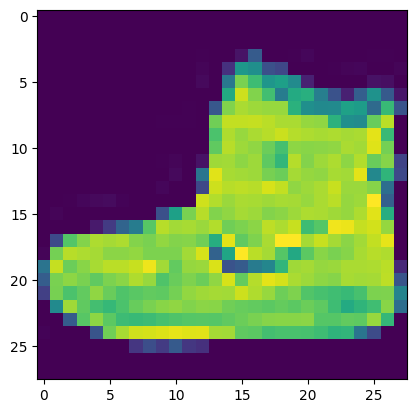

In [9]:
plt.imshow(image.squeeze())

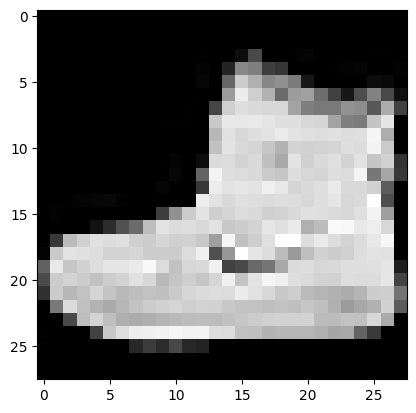

In [10]:
plt.imshow(image.squeeze(), cmap="gray")

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    print(i)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


<Figure size 900x900 with 0 Axes>